# import

In [2]:
import requests
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# 데이터 프레임 만들기

In [3]:
train_df = pd.DataFrame()
sise_url = 'https://finance.naver.com/item/sise_day.nhn?code=005930'

#네이버 금융은 웹크롤링을 일부만 허용하고 나머지는 차단
#일별 시세는 차단 되어있음
#해결방법은 user agent값을 변경

for page in range(91, 640):
    page_url = '{}&page={}'.format(sise_url, page)
    response_page = requests.get(page_url, headers={'User-agent': 'Mozilla/5.0'}).text
    train_df = train_df.append(pd.read_html(response_page)[0])

train_df = train_df.dropna() # n/a 제거
train_df = train_df.iloc[::-1] #인덱스를 옛날 -> 최근
train_df = train_df.reset_index(drop=True) # 인덱스 리셋
print(train_df)


#삼성전자는 2018.05.04부터 액면분할 50:1로
#train은 이전 데이터로
#test는 그 이후 데이터로 할 예정
#page 89, 90에는 거래가 없는 데이터가 포함되어있어서 제거

test_df = pd.DataFrame()
for tpage in range(1,89):
    tpage_url = '{}&page={}'.format(sise_url, tpage)
    response_page = requests.get(tpage_url, headers={'User-agent': 'Mozilla/5.0'}).text
    test_df = test_df.append(pd.read_html(response_page)[0])

test_df = test_df.dropna() # n/a 제거
test_df = test_df.iloc[::-1] #인덱스를 옛날-> 최근
test_df = test_df.reset_index(drop=True) # 인덱스 리셋
print(test_df)




              날짜         종가      전일비         시가         고가         저가  \
0     1996.07.05    71300.0    600.0    72000.0    72300.0    71000.0   
1     1996.07.06    71500.0    200.0    71300.0    72700.0    71300.0   
2     1996.07.08    70900.0    600.0    71600.0    71600.0    70800.0   
3     1996.07.09    71700.0    800.0    70900.0    71700.0    70100.0   
4     1996.07.10    70600.0   1100.0    71700.0    72000.0    70500.0   
...          ...        ...      ...        ...        ...        ...   
5485  2018.04.13  2490000.0  40000.0  2480000.0  2509000.0  2470000.0   
5486  2018.04.16  2517000.0  27000.0  2516000.0  2530000.0  2493000.0   
5487  2018.04.17  2499000.0  18000.0  2512000.0  2527000.0  2491000.0   
5488  2018.04.18  2568000.0  69000.0  2550000.0  2568000.0  2529000.0   
5489  2018.04.19  2639000.0  71000.0  2600000.0  2649000.0  2577000.0   

           거래량  
0      77960.0  
1      35510.0  
2      62100.0  
3      64910.0  
4      99200.0  
...        ...  
5485

# histogram 그리기

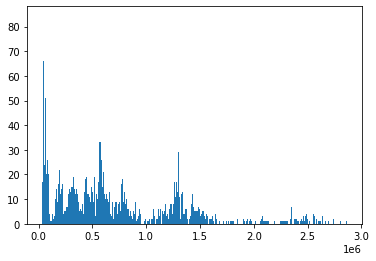

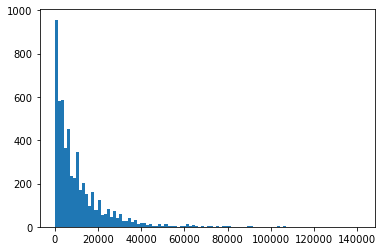

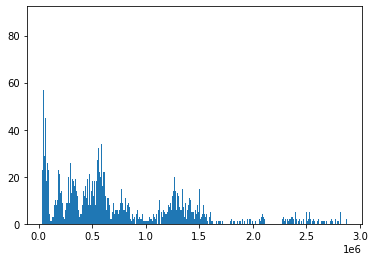

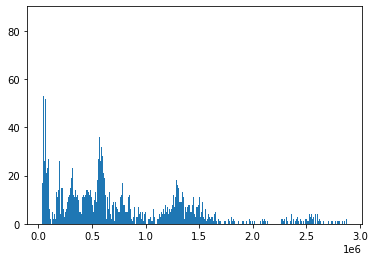

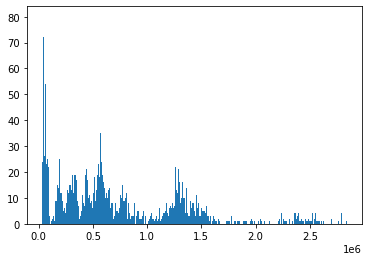

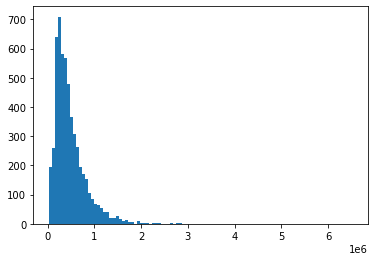

In [4]:
plt.hist(train_df['종가'], bins=1000)
plt.show()
plt.hist(train_df['전일비'], bins=100)
plt.show()
plt.hist(train_df['시가'], bins=1000)
plt.show()
plt.hist(train_df['고가'], bins=1000)
plt.show()
plt.hist(train_df['저가'], bins=1000)
plt.show()
plt.hist(train_df['거래량'], bins=100)
plt.show()

#종가와 거래량을 비교할 예정이었는데

# mean describe

In [90]:
train_df.describe()

,종가,전일비,시가,고가,저가,거래량,20일_이평선,BBU,BBD
count,5.490000e+03,5490.000000,5.490000e+03,5.490000e+03,5.490000e+03,5.490000e+03,5.471000e+03,5.471000e+03,5.471000e+03
mean,7.391622e+05,10684.863388,7.391637e+05,7.474006e+05,7.308347e+05,4.747766e+05,7.372911e+05,7.825237e+05,6.920585e+05
std,6.046906e+05,12884.371325,6.048251e+05,6.099847e+05,5.993881e+05,3.554894e+05,6.000461e+05,6.289457e+05,5.718804e+05
min,3.330000e+04,0.000000,3.360000e+04,3.460000e+04,3.260000e+04,1.736000e+04,3.787500e+04,4.277586e+04,2.595039e+04
25%,2.875000e+05,2000.000000,2.875000e+05,2.940000e+05,2.810000e+05,2.385998e+05,2.919375e+05,3.184233e+05,2.593417e+05
50%,5.780000e+05,6500.000000,5.790000e+05,5.850000e+05,5.720000e+05,3.830080e+05,5.786500e+05,6.114397e+05,5.409529e+05
75%,1.191750e+06,14500.000000,1.195750e+06,1.204750e+06,1.180000e+06,6.083200e+05,1.195875e+06,1.278046e+06,1.121241e+06
max,2.861000e+06,141000.000000,2.875000e+06,2.876000e+06,2.838000e+06,6.532440e+06,2.795500e+06,2.931327e+06,2.719762e+06


In [91]:
train_df.min()

날짜           1996.07.05
종가              33300.0
전일비                 0.0
시가              33600.0
고가              34600.0
저가              32600.0
거래량             17360.0
20일_이평선         37875.0
BBU        42775.859216
BBD        25950.390654
dtype: object

In [92]:
train_df.max()

날짜             2018.04.19
종가              2861000.0
전일비              141000.0
시가              2875000.0
고가              2876000.0
저가              2838000.0
거래량             6532440.0
20일_이평선         2795500.0
BBU        2931327.007323
BBD        2719762.225235
dtype: object

In [95]:
train_df.mean()

종가         739162.204007
전일비         10684.863388
시가         739163.697632
고가         747400.619308
저가         730834.717668
거래량        474776.565209
20일_이평선    737291.084811
BBU        782523.707849
BBD        692058.461772
dtype: float64

# linear Regression

## train데이터 확인

[0.958915]


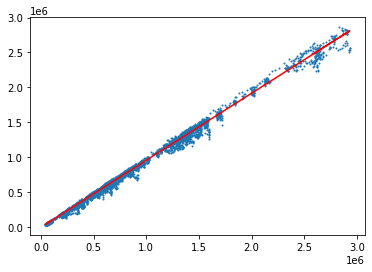

In [5]:
"""
X=np.array(train_df['거래량']).reshape(-1,1)
y = train_df['종가'] # 종가 예측
lr = LinearRegression()
lr.fit(X,y)
print(lr.coef_)

w = lr.coef_[0] #기울기 값

plt.scatter(X, y, s=1)
plt.plot(X, w*X, c='red')
"""
#의미있는 그래프가 아님..
#따라서 볼린저 밴드를 추가해서 비교

test_df=test_df.loc[:,]

#20일 볼린저밴드를 사용할 예정이라
train_df['20일_이평선'] = train_df['종가'].rolling(20).mean()
train_df['BBU'] = train_df['20일_이평선']+2*train_df['종가'].rolling(window=20).std() #볼린저 상단
train_df['BBD'] = train_df['20일_이평선']-2*train_df['종가'].rolling(window=20).std() #볼린저 하단



# 20일 데이터가 있어야 하므로 인덱스 0~18 까지는 볼린저 밴드값이 NaN return
# 수정된 train df만듬
mdtrain_df=train_df.loc[19:,:]
mdtrain_df = mdtrain_df.reset_index(drop=True) # 인덱스 리셋
#print(mdtrain_df)

X=np.array(mdtrain_df['BBU']).reshape(-1,1)
y = mdtrain_df['종가'] # 종가 예측
lr = LinearRegression()
lr.fit(X,y)
print(lr.coef_)

w = lr.coef_[0] #기울기 값

plt.scatter(X, y, s=1)
plt.plot(X, w*X, c='red')
#의미있는 그래프

#test data도 수정해줌
test_df['20일_이평선'] = test_df['종가'].rolling(20).mean()
test_df['BBU'] = test_df['20일_이평선']+2*test_df['종가'].rolling(window=20).std() #볼린저 상단
test_df['BBD'] = test_df['20일_이평선']-2*test_df['종가'].rolling(window=20).std() #볼린저 하단
mdtest_df=test_df.loc[19:,:]
mdtest_df = mdtest_df.reset_index(drop=True) # 인덱스 리셋
#print(mdtest_df)

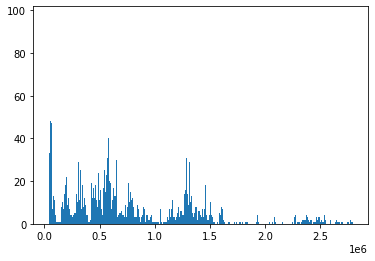

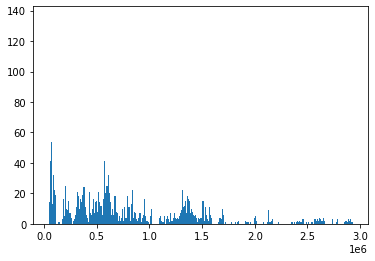

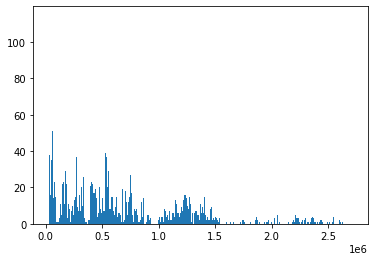

In [6]:
plt.hist(mdtrain_df['20일_이평선'], bins=1000)
plt.show()
plt.hist(mdtrain_df['BBU'], bins=1000)
plt.show()
plt.hist(mdtrain_df['BBD'], bins=1000)
plt.show()

## 테스트

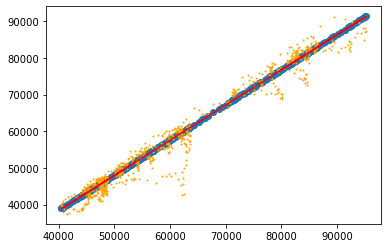

In [7]:
test_X = np.array(mdtest_df['BBU']).reshape(-1,1)
pred_y = lr.predict(test_X)+9000 #예측값 조정

plt.scatter(test_X, pred_y) #예측
plt.plot(test_X, w*test_X, c='red')

test_y = mdtest_df['종가']

plt.scatter(test_X, test_y, c='orange',s=1) #실제


### mean_squared_error 계산

In [8]:
from sklearn.metrics import mean_squared_error

testloss: 7441316.023331482 
trainloss: 1629096938.6975527


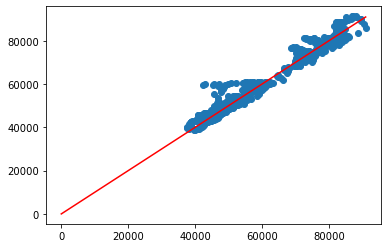

0.9653420854490432


In [9]:
test_loss = mean_squared_error(test_y, pred_y)


train_y = lr.predict(X)
train_loss = mean_squared_error(y, train_y)
print('testloss:',test_loss,'\ntrainloss:',train_loss)
#차이가 많이 남..

plt.scatter(test_y, pred_y)
plt.plot([0,np.max(test_y)],[0,np.max(test_y)],color='red')
plt.show()

from sklearn.metrics import r2_score
r2 = r2_score(test_y,pred_y)
print(r2)
#1에 매우 가깝
#상관관계가 있음

## 여러 변수 이용

In [10]:
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

trainloss: 1335010694.6254902
test loss: 7167546.501026733
0.9666171664536591


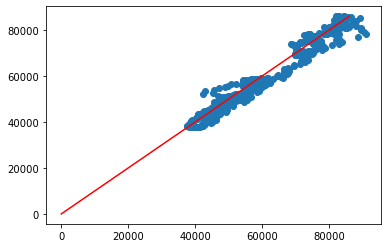

In [11]:
X = np.array(mdtrain_df.iloc[:,[7,8,9]])
y=mdtrain_df['종가']
lr = LinearRegression()
lr.fit(X,y)

train_y = lr.predict(X)
train_loss = mean_squared_error(y,train_y)
print('trainloss:', train_loss)


test_X = np.array(mdtest_df.iloc[:,[7,8,9]])
pred_y = lr.predict(test_X)
test_y = mdtest_df['종가']

test_loss = mean_squared_error(test_y,pred_y)

print('test loss:', test_loss)

plt.scatter(test_y, pred_y)
plt.plot([0,np.max(pred_y)],[0,np.max(pred_y)],color='red')

from sklearn.metrics import r2_score
r2=r2_score(test_y,pred_y)
print(r2)
#조금 올라감

# Ridge regression

In [12]:
import numpy as np
from sklearn.linear_model import Ridge
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

train loss: 1335010694.6254904
test loss: 7167546.50101728
0.9666171664537031


C:\Users\ohmon\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.92248e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


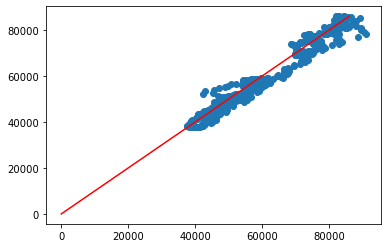

In [13]:
X = np.array(mdtrain_df.iloc[:,[7,8,9]])
y = mdtrain_df['종가']

Rr = Ridge(alpha = 1)
Rr.fit(X,y)

train_y = Rr.predict(X)
train_loss = mean_squared_error(y,train_y)
print('train loss:', train_loss)

test_X = np.array(mdtest_df.iloc[:,[7,8,9]])
pred_y = Rr.predict(test_X)
test_y = mdtest_df['종가']

test_loss = mean_squared_error(test_y, pred_y)

print('test loss:', test_loss)

plt.scatter(test_y,pred_y)
plt.plot([0,np.max(pred_y)], [0,np.max(pred_y)],color='red')

r2 = r2_score(test_y, pred_y)

print(r2)
#거의 비슷 
#0.9676485556665005

## alpha값 변경하면서 최적 찾기

In [14]:
import numpy as np
from sklearn.linear_model import Ridge
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [15]:
X = np.array(mdtrain_df.iloc[:,[7,8,9]])
y = mdtrain_df['종가']
test_X = np.array(mdtest_df.iloc[:,[7,8,9]])
test_y = mdtest_df['종가']

prev_best_r2 = 0.0
model_alph = 1.0
loss = 0.0

for test_a in np.arange(1,1000,1):
    Rr = Ridge(alpha = test_a)
    Rr.fit(X,y)
    
    pred_y = Rr.predict(test_X)
    
    train_loss = mean_squared_error(test_y, pred_y)
    r2 = r2_score(test_y, pred_y)
    if r2>prev_best_r2:
        prev_best_r2= r2
        model_alpha= test_a
        loss = train_loss
        
print("new best/ alpha:", model_alpha,"r2: ", prev_best_r2, "loss: ",loss)

C:\Users\ohmon\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.92248e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


new best/ alpha: 998 r2:  0.9666171664574048 loss:  7167546.500222517


array([0.33363249, 0.40320573, 0.2619327 ])

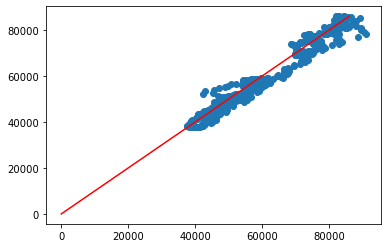

In [16]:
Rr = Ridge(alpha = 999)
Rr.fit(X, y)

pred_y = Rr.predict(test_X)
test_y = mdtest_df['종가']

plt.scatter(test_y, pred_y)
plt.plot([0,np.max(pred_y)],[0,np.max(pred_y)],color='red')
Rr.coef_
#절댓값이 큰게 종가를 찾는데 기여가 가장 큼

# Logistic Regression

In [53]:
import pandas as pd
import numpy as np


In [54]:
test_X = np.array(mdtest_df.iloc[:,[7,8,9]])
test_y = mdtest_df['종가']

X = np.array(mdtrain_df.iloc[:,[7,8,9]])
y = mdtrain_df['종가']




In [55]:
median_price = np.median(y)
# 0< median_price<1
print(np.median(y))
class_y = [1 if i>median_price else 0 for i in y]

#여기서 test를 예측할 때는 앞에서 train은 액면분할전 test는 액면분할 후 이므로
#test에서는 median의 값을 50으로 나눈후 액면분할가로 계산을 해준다
test_class_y = [1 if i>median_price//50 else 0 for i in test_y]



579000.0


In [56]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state = 0).fit(X, class_y)

In [57]:
predicted_y = clf.predict(test_X)
print(predicted_y)

predicted_prob_y = clf.predict_proba(test_X)
print(predicted_prob_y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 1 1 1 1 1 1 1 

In [58]:
clf.score(test_X, test_class_y)

0.9291521486643438

# ROC/AUC curv

In [59]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_class_y, predicted_y)
print(confusion_matrix)
# tf= 61
# ff =800 한쪽으로만 쏠림 다 f로 반환..

[[  0   0]
 [ 61 800]]


In [60]:
"""
그래서 roc_auc_는 만들수가 없음...
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(test_class_y, predicted_y)
fpr, tpr, thresholds = roc_curve(test_class_y, predicted_prob_y[:,1])
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1])
"""

'\n그래서 roc_auc_는 만들수가 없음...\nfrom matplotlib import pyplot as plt\nfrom sklearn.metrics import roc_auc_score\nfrom sklearn.metrics import roc_curve\nlogit_roc_auc = roc_auc_score(test_class_y, predicted_y)\nfpr, tpr, thresholds = roc_curve(test_class_y, predicted_prob_y[:,1])\nplt.plot(fpr, tpr)\nplt.plot([0,1],[0,1])\n'

In [61]:
import pandas as pd
import numpy as np

In [62]:
test_X = np.array(mdtest_df.iloc[:,[7,8,9]])
test_y = mdtest_df['종가']
X = np.array(mdtrain_df.iloc[:,[7,8,9]])
y = mdtrain_df['종가']

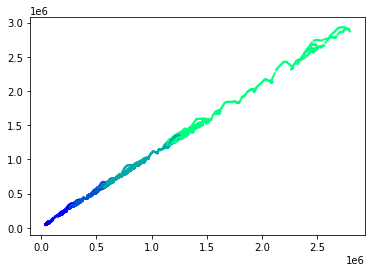

In [63]:
from matplotlib import pyplot as plt
class_label = y
percent25 = np.percentile(class_label, 25, axis=0)
percent50 = np.percentile(class_label, 50, axis=0)
percent75 = np.percentile(class_label, 75, axis=0)

class_label = [0 if j<percent25 else 1 if j<percent50 else 2 if j<percent75 else 3 for j in class_label]
plt.scatter(X[:,0],X[:,1], c=class_label, s=2, cmap='winter')

In [64]:
test_class_label = test_y
test_class_label = [0 if j < percent25 else 1 if j<percent50 else 2 if j<percent75 else 3 for j in test_class_label]

In [65]:
from sklearn import neighbors
weights = 'distance'
n_neighbors=10
clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
clf.fit(X, class_label)

KNeighborsClassifier(n_neighbors=10, weights='distance')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       861

    accuracy                           1.00       861
   macro avg       1.00      1.00      1.00       861
weighted avg       1.00      1.00      1.00       861



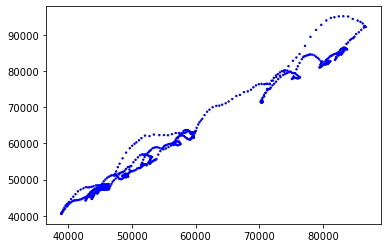

In [66]:
from sklearn.metrics import classification_report

predict_y = clf.predict(test_X)
#print(predict_y)

plt.scatter(test_X[:,0],test_X[:,1],c=predict_y, s=2, cmap='winter')
print(classification_report(test_class_label,predict_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       861

    accuracy                           1.00       861
   macro avg       1.00      1.00      1.00       861
weighted avg       1.00      1.00      1.00       861



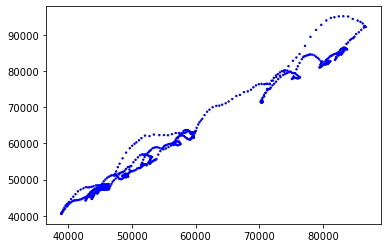

In [67]:
from sklearn.neighbors import NearestCentroid
clf = NearestCentroid()
clf.fit(X,class_label)

from sklearn.metrics import classification_report

predict_y = clf.predict(test_X)

plt.scatter(test_X[:,0],test_X[:,1],c=predict_y, s=2, cmap='winter')
print(classification_report(test_class_label, predict_y))

In [68]:
test_X = np.array(mdtest_df.iloc[:,[7,8,9]])
test_y = mdtest_df['종가']

X = np.array(mdtrain_df.iloc[:,[7,8,9]])
y = mdtrain_df['종가']

class_label = y
percent25 = np.percentile(class_label, 25, axis=0)
percent50 = np.percentile(class_label, 50, axis=0)
percent75 = np.percentile(class_label, 75, axis=0)

class_label = [0 if j<percent75 else 1 for j in class_label]
test_class_label = [0 if j<percent75 else 1 for j in test_class_label]

In [69]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

clf = MLPClassifier(solver = 'adam', max_iter=1000, alpha=1e-5,
                   hidden_layer_sizes=(3,3,3,1),random_state=1)

clf.fit(X, class_label)
print(clf)

predict_y = clf.predict(test_X)
print(classification_report(test_class_label,predict_y))

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(3, 3, 3, 1), max_iter=1000,
              random_state=1)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       861

    accuracy                           1.00       861
   macro avg       1.00      1.00      1.00       861
weighted avg       1.00      1.00      1.00       861



In [70]:
import requests
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [71]:
df = pd.DataFrame()
sise_url = 'https://finance.naver.com/item/sise_day.nhn?code=005930'


for page in range(1, 88):
    page_url = '{}&page={}'.format(sise_url, page)
    response_page = requests.get(page_url, headers={'User-agent': 'Mozilla/5.0'}).text
    df = df.append(pd.read_html(response_page)[0])

df = df.dropna() # n/a 제거
df = df.iloc[::-1] #인덱스를 옛날 -> 최근
df = df.reset_index(drop=True) # 인덱스 리셋

In [72]:
print(df)

             날짜       종가     전일비       시가       고가       저가         거래량
0    2018.06.07  50600.0   700.0  51800.0  51800.0  50500.0  13590016.0
1    2018.06.08  49650.0   950.0  50200.0  50400.0  49600.0  16951706.0
2    2018.06.11  49900.0   250.0  49750.0  50300.0  49350.0  10571312.0
3    2018.06.12  49400.0   500.0  49700.0  49800.0  49250.0  12110569.0
4    2018.06.14  48200.0  1200.0  49000.0  49000.0  48200.0  20971729.0
..          ...      ...     ...      ...      ...      ...         ...
865  2021.12.09  78200.0   800.0  77400.0  78200.0  77000.0  21604528.0
866  2021.12.10  76900.0  1300.0  77400.0  77600.0  76800.0   9155219.0
867  2021.12.13  76800.0   100.0  77200.0  78300.0  76500.0  15038750.0
868  2021.12.14  77000.0   200.0  76500.0  77200.0  76200.0  10976660.0
869  2021.12.15  77600.0   600.0  76400.0  77600.0  76300.0   9355116.0

[870 rows x 7 columns]


In [73]:
pd.to_datetime(df['날짜'],format = '%Y-%m-%d')

0     2018-06-07
1     2018-06-08
2     2018-06-11
3     2018-06-12
4     2018-06-14
         ...    
865   2021-12-09
866   2021-12-10
867   2021-12-13
868   2021-12-14
869   2021-12-15
Name: 날짜, Length: 870, dtype: datetime64[ns]

In [74]:
import seaborn as sns


<AxesSubplot:xlabel='날짜', ylabel='종가'>

C:\Users\ohmon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ohmon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ohmon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ohmon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ohmon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ohmon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51676 missing from cur

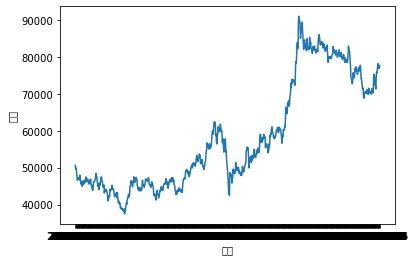

In [88]:
plt.figure()
sns.lineplot(y=df['종가'], x=df['날짜'])


In [76]:
#데이터 정규화
from sklearn.preprocessing import MinMaxScaler

df.sort_index(ascending=False).reset_index(drop=True)

scaler = MinMaxScaler()
scale_cols = ['시가', '고가', '저가', '종가', '거래량']
df_scaled = scaler.fit_transform(df[scale_cols])
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

df_scaled

,시가,고가,저가,종가,거래량
0,0.271523,0.239865,0.259259,0.245565,0.106909
1,0.241249,0.216216,0.242165,0.227824,0.146045
2,0.232734,0.214527,0.237417,0.232493,0.071767
3,0.231788,0.206081,0.235518,0.223156,0.089686
4,0.218543,0.192568,0.215575,0.200747,0.192844
...,...,...,...,...,...
865,0.755913,0.685811,0.762583,0.760971,0.200210
866,0.755913,0.675676,0.758784,0.736695,0.055282
867,0.752129,0.687500,0.753086,0.734827,0.123775
868,0.738884,0.668919,0.747388,0.738562,0.076486


# LSTM

In [77]:
TEST_SIZE = 300 # 300일 이전의 데이터 학습
WINDOW_SIZE = 20 # 20일을 기준으로 예측

train = df_scaled[:-TEST_SIZE]
test = df_scaled[-TEST_SIZE:]

In [78]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [79]:
from sklearn.model_selection import train_test_split

feature_cols = ['시가', '고가', '저가', '거래량']
label_cols = ['종가']

train_feature = train[feature_cols]
train_label = train[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 20)

x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
x_train.shape, x_valid.shape

((440, 20, 4), (110, 20, 4))

In [80]:
test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature.shape, test_label.shape

((300, 4), (300, 1))

In [81]:
test_feature, test_label = make_dataset(test_feature, test_label, 20)
test_feature.shape, test_label.shape

((280, 20, 4), (280, 1))

In [82]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )

model.add(Dense(1))

In [83]:
import os

model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)

model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train, 
                                    epochs=200, 
                                    batch_size=16,
                                    validation_data=(x_valid, y_valid), 
                                    callbacks=[early_stop, checkpoint])

Epoch 1/200
22/28 [======================>.......] - ETA: 0s - loss: 0.0562
Epoch 00001: val_loss improved from inf to 0.01294, saving model to model\tmp_checkpoint.h5
28/28 [==============================] - 2s 20ms/step - loss: 0.0481 - val_loss: 0.0129
Epoch 2/200
24/28 [========================>.....] - ETA: 0s - loss: 0.0052
Epoch 00002: val_loss improved from 0.01294 to 0.00438, saving model to model\tmp_checkpoint.h5
28/28 [==============================] - 0s 10ms/step - loss: 0.0050 - val_loss: 0.0044
Epoch 3/200
23/28 [=======================>......] - ETA: 0s - loss: 0.0028
Epoch 00003: val_loss improved from 0.00438 to 0.00292, saving model to model\tmp_checkpoint.h5
28/28 [==============================] - 0s 13ms/step - loss: 0.0027 - val_loss: 0.0029
Epoch 4/200
23/28 [=======================>......] - ETA: 0s - loss: 0.0021
Epoch 00004: val_loss improved from 0.00292 to 0.00248, saving model to model\tmp_checkpoint.h5
28/28 [==============================] - 0s 9ms/step

21/28 [=====================>........] - ETA: 0s - loss: 5.7176e-04
Epoch 00032: val_loss improved from 0.00095 to 0.00093, saving model to model\tmp_checkpoint.h5
28/28 [==============================] - 0s 8ms/step - loss: 5.9693e-04 - val_loss: 9.2672e-04
Epoch 33/200
19/28 [===================>..........] - ETA: 0s - loss: 6.2424e-04
Epoch 00033: val_loss improved from 0.00093 to 0.00090, saving model to model\tmp_checkpoint.h5
28/28 [==============================] - 0s 8ms/step - loss: 5.7586e-04 - val_loss: 9.0309e-04
Epoch 34/200
28/28 [==============================] - ETA: 0s - loss: 5.9899e-04
Epoch 00034: val_loss improved from 0.00090 to 0.00089, saving model to model\tmp_checkpoint.h5
28/28 [==============================] - 0s 8ms/step - loss: 5.9899e-04 - val_loss: 8.9474e-04
Epoch 35/200
23/28 [=======================>......] - ETA: 0s - loss: 5.6043e-04
Epoch 00035: val_loss improved from 0.00089 to 0.00087, saving model to model\tmp_checkpoint.h5
28/28 [=============

In [84]:
model.load_weights(filename)
pred = model.predict(test_feature)

pred.shape

(280, 1)

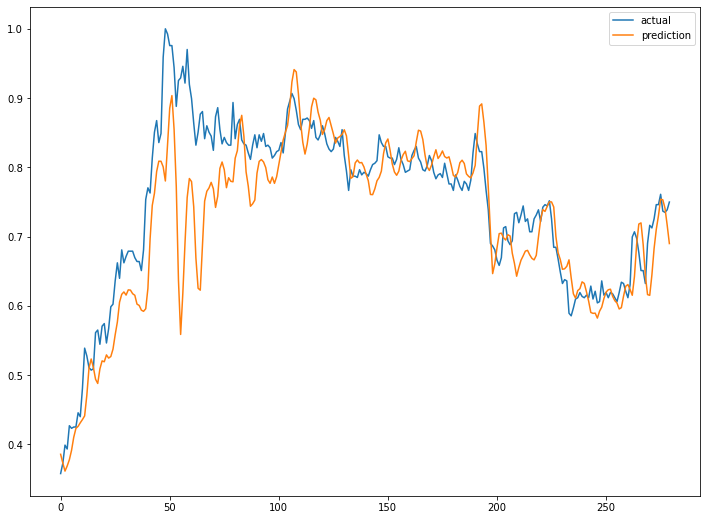

In [85]:
plt.figure(figsize=(12, 9))
plt.plot(test_label, label = 'actual')
plt.plot(pred, label = 'prediction')
plt.legend()
plt.show()